# Module 5 Project

## Obtaining the datasets

In [1]:
import pandas as pd
df = pd.read_csv('train_users_2.csv')
df.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213451 entries, 0 to 213450
Data columns (total 16 columns):
id                         213451 non-null object
date_account_created       213451 non-null object
timestamp_first_active     213451 non-null int64
date_first_booking         88908 non-null object
gender                     213451 non-null object
age                        125461 non-null float64
signup_method              213451 non-null object
signup_flow                213451 non-null int64
language                   213451 non-null object
affiliate_channel          213451 non-null object
affiliate_provider         213451 non-null object
first_affiliate_tracked    207386 non-null object
signup_app                 213451 non-null object
first_device_type          213451 non-null object
first_browser              213451 non-null object
country_destination        213451 non-null object
dtypes: float64(1), int64(2), object(13)
memory usage: 26.1+ MB


### Obtaining 'sessions' dataset

In [3]:
#sessions = pd.read_csv('sessions.csv')
#sessions.head()

## Data preparation and cleaning

### Redefining target

In [4]:
#redefining target
#user who made a booking = 1
#user who did not make a booking = 0
df.loc[(df['country_destination'] != 'NDF','country_destination')] = 1
df.loc[(df['country_destination'] == 'NDF','country_destination')] = 0

In [5]:
#renaming target column
df = df.rename(columns={'country_destination':'target'})

### Dropping unnecessary columns

In [6]:
#drop date_first_booking - this column copies the target column and would cause data leakage
df.drop('date_first_booking',axis=1, inplace=True)

### Manipulating date_account_created and timestamp_first_active columns

In [7]:
df.head()

,id,date_account_created,timestamp_first_active,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,target
0,gxn3p5htnn,2010-06-28,20090319043255,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,0
1,820tgsjxq7,2011-05-25,20090523174809,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,0
2,4ft3gnwmtx,2010-09-28,20090609231247,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,1
3,bjjt8pjhuk,2011-12-05,20091031060129,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,1
4,87mebub9p4,2010-09-14,20091208061105,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,1


In [8]:
df['date_account_created']= pd.to_datetime(df['date_account_created']) 
df['timestamp_first_active']= pd.to_datetime(df['timestamp_first_active'])


In [9]:
df.head() # timestamp_first_active shows incorrect dates, NEEDS FIXING!!

,id,date_account_created,timestamp_first_active,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,target
0,gxn3p5htnn,2010-06-28,1970-01-01 05:34:50.319043255,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,0
1,820tgsjxq7,2011-05-25,1970-01-01 05:34:50.523174809,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,0
2,4ft3gnwmtx,2010-09-28,1970-01-01 05:34:50.609231247,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,1
3,bjjt8pjhuk,2011-12-05,1970-01-01 05:34:51.031060129,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,1
4,87mebub9p4,2010-09-14,1970-01-01 05:34:51.208061105,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,1


### Gender column

In [10]:
df.gender.value_counts()

-unknown-    95688
FEMALE       63041
MALE         54440
OTHER          282
Name: gender, dtype: int64

### Age column

In [11]:
df.age.isna().sum()
#this column has 87990 missing values, that is more than a third of the dataset

#mean age before cleaning: 49.6
#median age before cleaning: 34


87990

In [12]:
df.age.value_counts()
#there are numerous errors in this column and many missing values
#for the sake of simplicity, remove all rows with errors and replace missing values with median age

#finding all ages over 110
indexNames = df[df['age'] > 110].index

#deleting these row indexes from dataFrame
df.drop(indexNames, inplace=True)

#replacing NaNs with median
df['age'].fillna((df['age'].median()), inplace=True)
#Note - replacing the NaNs with median did not affect the median of target users. This suggest that age is not
#defining element

df.age.isna().sum()

0

* Mean age after cleaning: 35 - significantly lower from 49 due to removing outliers
* Meadian age after cleaning: 34 - stayed the same

In [13]:
df.signup_flow.value_counts()
#the page a user came to signup up from
#What does this mean?

0     164091
25     14645
12      9315
3       8773
2       6846
24      4315
23      2827
1       1033
6        297
8        240
21       195
5         35
20        14
16        11
15        10
10         2
4          1
Name: signup_flow, dtype: int64

In [14]:
df.language.value_counts()
#since vast majority is english, this column might not bring much information.
#Also, it would create many caterogies and increase the dimensionality
#For now, I will drop whis column from the dataset

#UPDATE = I will keep this columns for experimentation
#df.drop('language', axis =1, inplace=True)

en    205525
zh      1632
fr      1171
es       912
ko       745
de       732
it       513
ru       388
pt       239
ja       225
sv       122
nl        96
tr        64
da        58
pl        54
cs        31
no        30
th        24
el        24
id        22
hu        17
fi        14
ca         5
is         5
hr         2
Name: language, dtype: int64

In [15]:
df.columns

Index(['id', 'date_account_created', 'timestamp_first_active', 'gender', 'age',
       'signup_method', 'signup_flow', 'language', 'affiliate_channel',
       'affiliate_provider', 'first_affiliate_tracked', 'signup_app',
       'first_device_type', 'first_browser', 'target'],
      dtype='object')

In [16]:
df.affiliate_provider.value_counts()

direct                 136919
google                  51489
other                   12504
craigslist               3446
bing                     2320
facebook                 2268
vast                      827
padmapper                 766
facebook-open-graph       544
yahoo                     495
gsp                       452
meetup                    347
email-marketing           166
naver                      52
baidu                      29
yandex                     17
wayn                        8
daum                        1
Name: affiliate_provider, dtype: int64

In [17]:
df.first_affiliate_tracked.isna().sum()
#whats the first marketing the user interacted with before the signing up
#6030 missing values

6030

In [18]:
df.first_affiliate_tracked.value_counts()

untracked        108854
linked            46089
omg               43836
tracked-other      6123
product            1545
marketing           139
local ops            34
Name: first_affiliate_tracked, dtype: int64

In [19]:
#replacing NaNs with the most common value 'untracked"'
df.first_affiliate_tracked.fillna('untracked',inplace=True)

In [20]:
df.first_browser.value_counts()
#many under-represented categories
#top 6 browsers = 209 509 users = 98.5% of users
#I will turn the remaining categories into 'other'
#UPDATE - For experiment I will keep this column as it is

#df.loc[(df.first_browser != 'Chrome') & (df.first_browser != 'Safari')& (df.first_browser != 'Firefox')& (df.first_browser != '-unknown-')& (df.first_browser != 'Mobile Safari')& (df.first_browser != 'IE'),'first_browser']='other'

Chrome                  63620
Safari                  44991
Firefox                 33512
-unknown-               27199
IE                      20977
Mobile Safari           19201
Chrome Mobile            1260
Android Browser           845
AOL Explorer              240
Opera                     187
Silk                      123
Chromium                   73
BlackBerry Browser         52
Maxthon                    46
IE Mobile                  36
Apple Mail                 36
Sogou Explorer             33
Mobile Firefox             30
SiteKiosk                  24
RockMelt                   24
Iron                       17
IceWeasel                  13
Pale Moon                  12
SeaMonkey                  11
CometBird                  11
Yandex.Browser             11
Camino                      9
TenFourFox                  8
CoolNovo                    6
wOSBrowser                  6
Opera Mini                  4
Avant Browser               4
Mozilla                     3
SlimBrowse

### Preparing 'sessions' dataset (removed for insufficient data - sessions data only from the start of 2014 

In [21]:
#sessions.head()

In [22]:
#s_id = pd.Series(sessions.user_id.unique())
#df_id = pd.Series(df.id)

#print(len(s_id.unique()))
#print(len(df_id.unique()))
#each dataset has a different number of unique users

In [23]:
#let's try merging the data to find whether we have any intersection
#s_id = s_id.rename('id')
#intersection = pd.merge(s_id, df_id, how='inner')
#len(intersection)
#it seems that we have 73 680 common users in each datasets

In [24]:
#action_count = sessions.groupby(['user_id'])['action'].nunique() # number of unique actions a user performed on the website

In [25]:
#Here I am mergin the unique numbers of actions per user with our main dataset
#action_count = pd.DataFrame(action_count)
#action_count = action_count.rename(columns={'0':'unique_sessions'})
#action_count = action_count.reset_index()
#action_count = action_count.rename(columns={'user_id':'id'})

In [26]:
#the column 'action' will now contain a number of unique action a user has performed on the website
#df = pd.merge(df,action_count,how='inner')

In [27]:
#df = df.drop('index',axis=1)

In [28]:
df.head()

,id,date_account_created,timestamp_first_active,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,target
0,gxn3p5htnn,2010-06-28,1970-01-01 05:34:50.319043255,-unknown-,34.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,0
1,820tgsjxq7,2011-05-25,1970-01-01 05:34:50.523174809,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,0
2,4ft3gnwmtx,2010-09-28,1970-01-01 05:34:50.609231247,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,1
3,bjjt8pjhuk,2011-12-05,1970-01-01 05:34:51.031060129,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,1
4,87mebub9p4,2010-09-14,1970-01-01 05:34:51.208061105,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,1


# EDA

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
#sns.set_style('whitegrid')


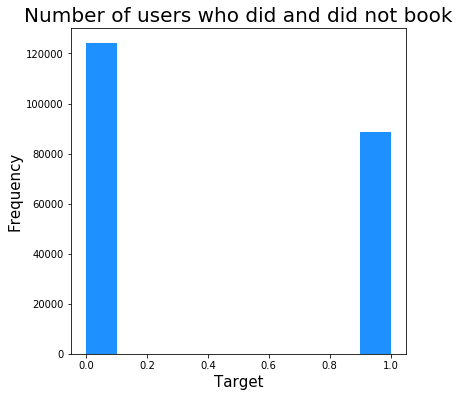

In [27]:
plt.figure(figsize=(6,6))
plt.xlabel('Target', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.title('Number of users who did and did not book',fontsize=20)
plt.hist(df.target,color='dodgerblue',rwidth=5);

As we can see in this histogram, just over XXX users from the dataset did make a booking and around XXX did not. This suggests we have a target class imbalance which might have to be rectified by upsampling.

## Who are AirBnb customers?

Let's now have a look at the data from users who made a booking on the website and compare it with users who did not book. This might help us find indication of what are the important features. 

### AGE

In [28]:
#creating separate datasets for users who did and did not book

#'yes booking = yb'
yb = df.loc[df.target == 1]

#'no booking = nb'
nb = df.loc[df.target == 0]

Median age of users who booked: 34.0
Median age of users who did not book: 34.0


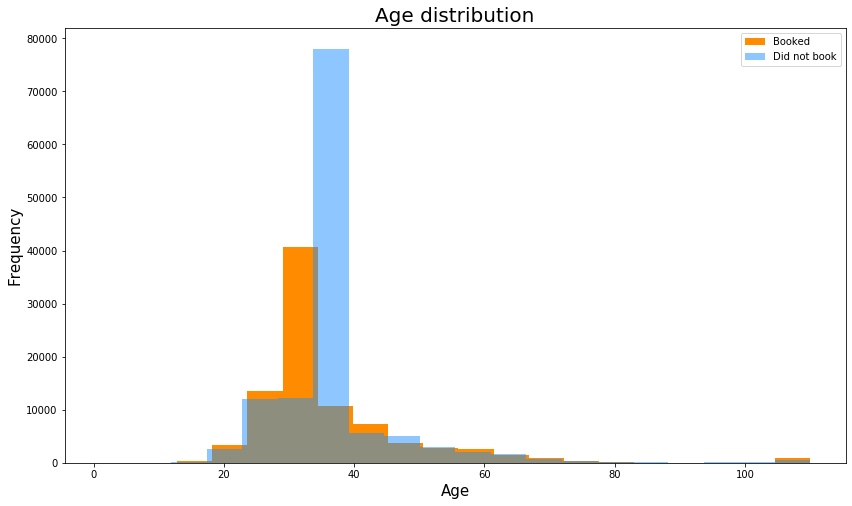

In [29]:
plt.figure(figsize=(14,8))
plt.xlabel('Age', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.title('Age distribution',fontsize=20)
plt.hist(yb.age,color='darkorange',rwidth=5,alpha=1,label='Booked',bins=20)
plt.hist(nb.age,color='dodgerblue',rwidth=5,alpha=0.5,label='Did not book',bins=20)
plt.legend();

print('Median age of users who booked: '+str(round(yb.age.median(),2)))
print('Median age of users who did not book: '+str(round(nb.age.median(),2)))

* The age of users who did not book is more concentrated around the mean age (it has a strong peak in ages between 35 to 40).
* The peak of users who booked is in the previous bin, but the peak is less strong. 
* Most users are between 25 to 40. Both distributions have positive/right skew. 
* Median for both distributions is almost identical.


### GENDER

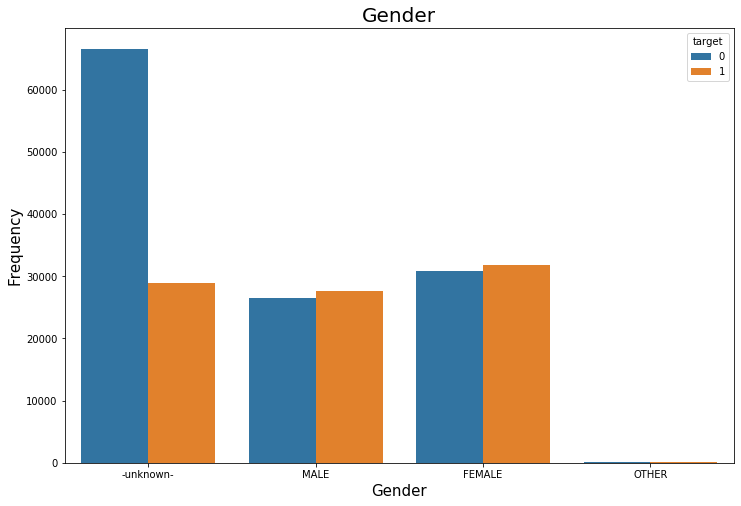

In [30]:
plt.figure(figsize=(12,8))
sns.countplot(x='gender',hue='target',data=df)
plt.xlabel('Gender', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.title('Gender',fontsize=20);

* The distribution of gender categories is pretty equal among users who made a booking, just below 10 000 each.
* Users whose gender is unknown were twice as likely not to make a booking compared to other gender categories.
* This seems to be a significant factor for determining a user who will not make a booking. 
* Also, if take into consideration the class imbalance mentioned above, users whose gender we know are generally more likely to make a booking than not!

### Sign-up method

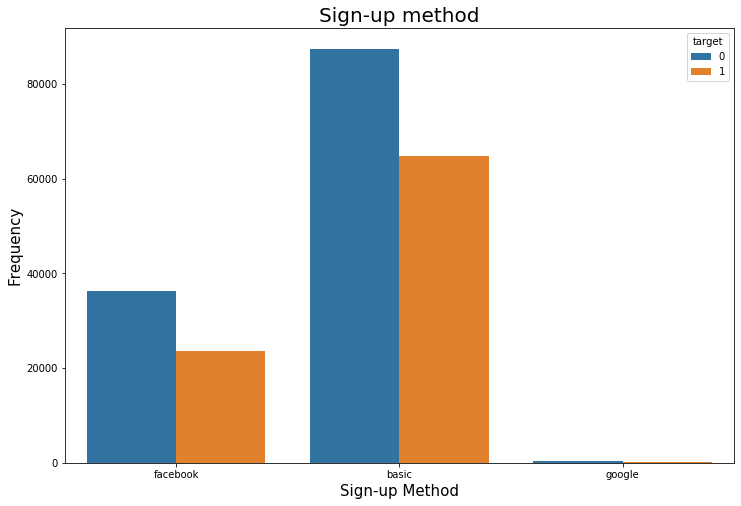

In [31]:
plt.figure(figsize=(12,8))
sns.countplot(x='signup_method',hue='target',data=df)
plt.xlabel('Sign-up Method', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.title('Sign-up method',fontsize=20);

In [32]:
df.head()

,id,date_account_created,timestamp_first_active,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,target
0,gxn3p5htnn,2010-06-28,1970-01-01 05:34:50.319043255,-unknown-,34.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,0
1,820tgsjxq7,2011-05-25,1970-01-01 05:34:50.523174809,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,0
2,4ft3gnwmtx,2010-09-28,1970-01-01 05:34:50.609231247,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,1
3,bjjt8pjhuk,2011-12-05,1970-01-01 05:34:51.031060129,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,1
4,87mebub9p4,2010-09-14,1970-01-01 05:34:51.208061105,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,1


### When did users create their accounts

In [33]:
dates_ac_created_yb = dict(yb.date_account_created.value_counts())
dates_ac_created_nb = dict(nb.date_account_created.value_counts())

In [34]:
dict_ac_created_yb = dict()

for key in sorted(dates_ac_created_yb.keys()):
    dict_ac_created_yb.update({key:dates_ac_created_yb[key]})

dict_ac_created_nb = dict()

for key in sorted(dates_ac_created_nb.keys()):
    dict_ac_created_nb.update({key:dates_ac_created_nb[key]})

In [35]:
series_ac_created_yb = pd.Series(dict_ac_created_yb)
series_ac_created_nb = pd.Series(dict_ac_created_nb)

C:\Users\Nikol\AppData\Local\conda\conda\envs\learn-env\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


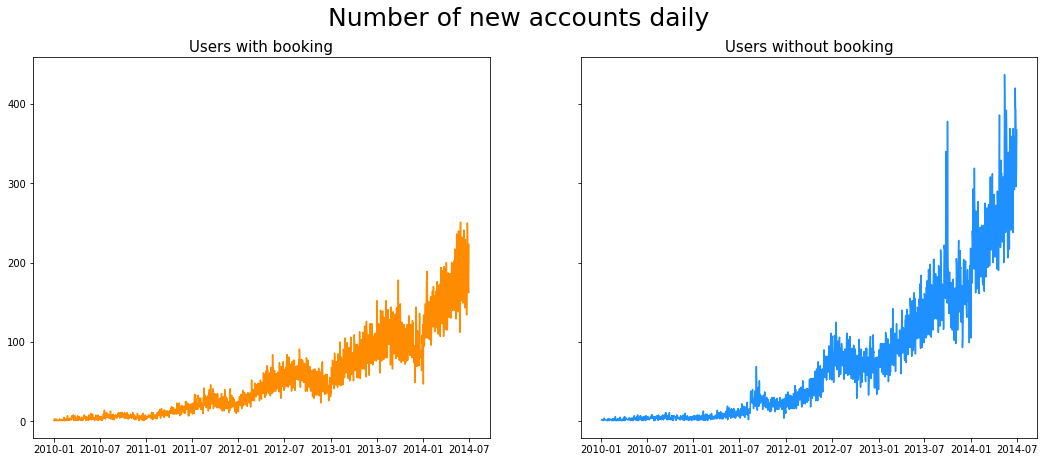

In [36]:
fig, axs = plt.subplots(1, 2, figsize=(18,7), sharey=True)
axs[0].plot(series_ac_created_yb,color='darkorange')
axs[0].set_title('Users with booking',fontsize=15)
axs[1].plot(series_ac_created_nb,color='dodgerblue')
axs[1].set_title('Users without booking',fontsize=15)
fig.suptitle('Number of new accounts daily',fontsize=25);

### First browser

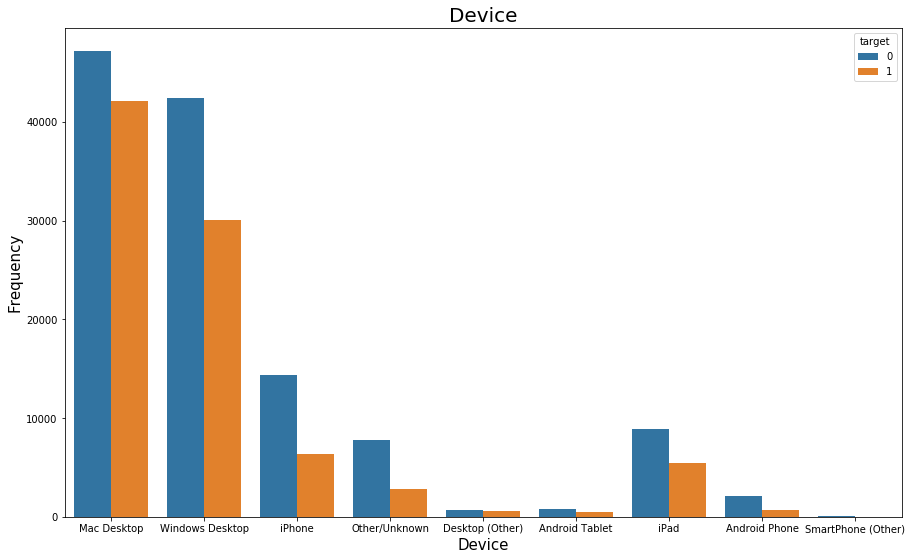

In [37]:
plt.figure(figsize=(15,9))
sns.countplot(x='first_device_type',hue='target',data=df)
plt.xlabel('Device', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.title('Device',fontsize=20);

* By far the most popular devices as Mac and Windows desktop computers.
* Users of Mac Desktop are more likely to make a booking due to a small difference between users who booked it who did not


### Sign-up Flow (the page a user came to signup up from)

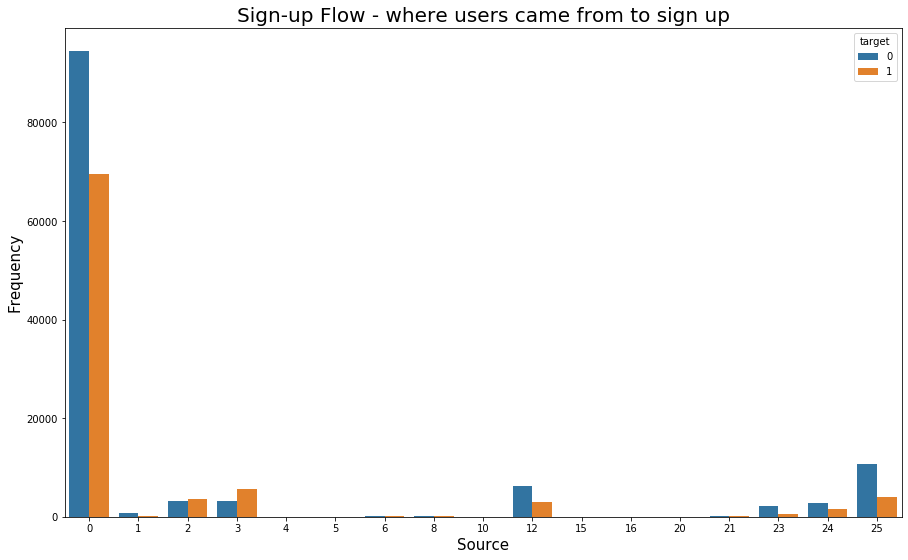

In [38]:
plt.figure(figsize=(15,9))
sns.countplot(x='signup_flow',hue='target',data=df)
plt.xlabel('Source', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.title('Sign-up Flow - where users came from to sign up',fontsize=20);

* Unfortunately we don't know what sources there numbers represent, but most common by far is '0'
* Sources number 2 and 3 are most effective at converting users

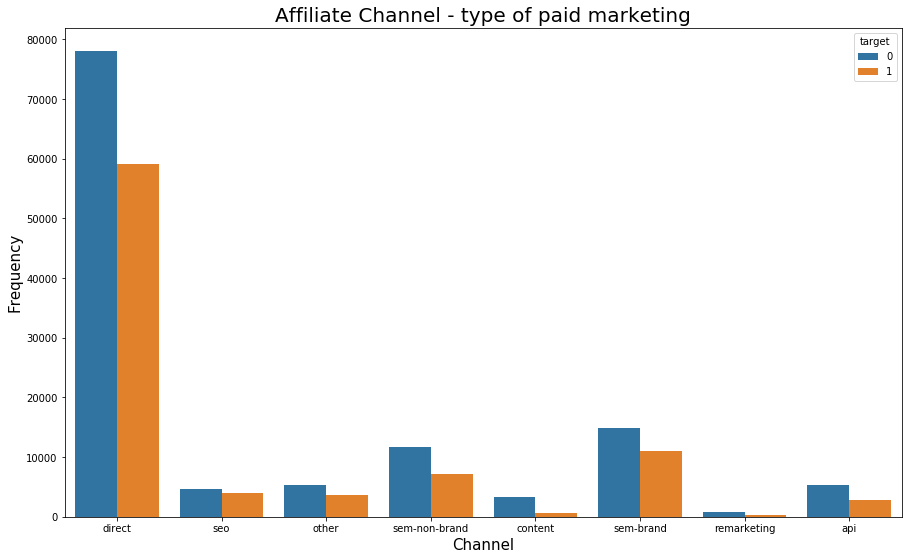

In [39]:
plt.figure(figsize=(15,9))
sns.countplot(x='affiliate_channel',hue='target',data=df)
plt.xlabel('Channel', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.title('Affiliate Channel - type of paid marketing',fontsize=20);

### Upsampling the minority class (0) to fix class imbalance

In [40]:
from sklearn.utils import resample

# Separate majority and minority classes
#yb = class 1 = minority class
#nb = class 0 = majority class
 
# Upsample minority class
df_minority_upsampled = resample(yb,
                             	replace=True, 	# sample with replacement
                             	n_samples=len(nb),    # to match majority class
                             	random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
df= pd.concat([nb, df_minority_upsampled])
 
# Display new class counts
df.target.value_counts()


1    124124
0    124124
Name: target, dtype: int64

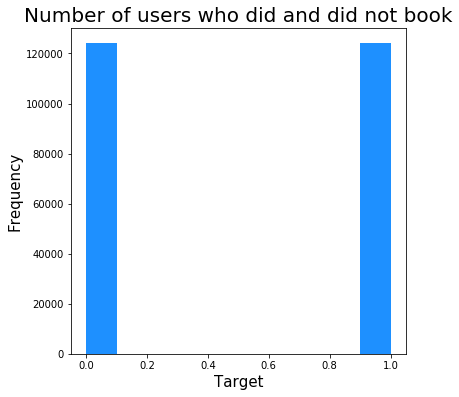

In [41]:
plt.figure(figsize=(6,6))
plt.xlabel('Target', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.title('Number of users who did and did not book',fontsize=20)
plt.hist(df.target,color='dodgerblue',rwidth=5);

In [42]:
df.head(20)

,id,date_account_created,timestamp_first_active,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,target
0,gxn3p5htnn,2010-06-28,1970-01-01 05:34:50.319043255,-unknown-,34.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,0
1,820tgsjxq7,2011-05-25,1970-01-01 05:34:50.523174809,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,0
11,om1ss59ys8,2010-01-05,1970-01-01 05:35:00.105051812,FEMALE,47.0,basic,0,en,other,craigslist,untracked,Web,iPhone,-unknown-,0
13,dy3rgx56cu,2010-01-05,1970-01-01 05:35:00.105083259,FEMALE,37.0,basic,0,en,other,craigslist,linked,Web,Mac Desktop,Firefox,0
14,ju3h98ch3w,2010-01-07,1970-01-01 05:35:00.107055820,FEMALE,36.0,basic,0,en,other,craigslist,untracked,Web,iPhone,Mobile Safari,0
16,2dwbwkx056,2010-01-07,1970-01-01 05:35:00.107215125,-unknown-,34.0,basic,0,en,other,craigslist,untracked,Web,Other/Unknown,-unknown-,0
18,cxlg85pg1r,2010-01-08,1970-01-01 05:35:00.108015641,-unknown-,34.0,basic,0,en,seo,facebook,untracked,Web,Other/Unknown,-unknown-,0
23,jha93x042q,2010-01-11,1970-01-01 05:35:00.111224015,-unknown-,34.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,0
24,7i49vnuav6,2010-01-11,1970-01-01 05:35:00.111230808,FEMALE,40.0,basic,0,en,seo,google,untracked,Web,Mac Desktop,Firefox,0
26,bjg0m5otl3,2010-01-12,1970-01-01 05:35:00.112155420,-unknown-,34.0,basic,0,en,other,other,untracked,Web,Other/Unknown,-unknown-,0


In [43]:
#dropping unneccesary columns
df.drop('id',axis=1, inplace= True)

df.drop('date_account_created',axis=1, inplace= True)

df.drop('timestamp_first_active',axis=1, inplace= True)

### Creating dummy variables

In [44]:
df = pd.get_dummies(data=df, columns=['gender', 'signup_method','signup_flow','language','affiliate_channel',
       'affiliate_provider', 'first_affiliate_tracked', 'signup_app',
       'first_device_type', 'first_browser'])

In [45]:
len(df.columns)
df.head()
len(df)

248248

 ### Splitting an initial testing set (10% of data)

In [46]:
#I am going to cut away a random 10% of the dataset for final testing.

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

X_initial_split = df.drop('target',axis=1)
y_initial_split = df.target

#is = 'initial split'
X_train_is, X_test_is, y_train_is, y_test_is = train_test_split(X_initial_split, y_initial_split, test_size=0.1, random_state=123)

In [47]:
len(X_train_is)
# this is 90% of our original dataset
# I will now overwrite this and will be using this to build all following models

223423

In [48]:
#Merging our dataset back together
df = pd.concat([X_train_is,y_train_is],axis=1)

## Fitting baseline simple model (random forest)

In [49]:
#importing libraries
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score



In [50]:
X = df.drop('target',axis=1)
y = df.target

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=123)

In [52]:
#importing libraries for PCA and scaling data

from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler


In [53]:
#scaling data for PCA
scaler = StandardScaler()
scaled_X_train = pd.DataFrame(scaler.fit_transform(X_train))

In [54]:
#fitting PCA components

pca_1 = PCA(n_components=110)
pca_2 = PCA(n_components=120)
pca_3 = PCA(n_components=130)

principalComponents = pca_1.fit_transform(scaled_X_train)
principalComponents = pca_2.fit_transform(scaled_X_train)
principalComponents = pca_3.fit_transform(scaled_X_train)

In [55]:
#looking at explained variance ratio of different number of components
print(np.sum(pca_1.explained_variance_ratio_))
print(np.sum(pca_2.explained_variance_ratio_))
print(np.sum(pca_3.explained_variance_ratio_))

#120 components explains 97% of the variance

0.9204727562023589
0.9758143457463881
0.9992093420889412


In [56]:
#BASELINE MODEL WITHOUT GRIDSEARCH

pipe_baseline = Pipeline([('scl', MinMaxScaler()),
                  ('pca', PCA(n_components=120)),
                  ('clf', RandomForestClassifier(random_state = 123))])

pipe_baseline.fit(X_train,y_train)


C:\Users\Nikol\AppData\Local\conda\conda\envs\learn-env\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Pipeline(memory=None,
         steps=[('scl', MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('pca',
                 PCA(copy=True, iterated_power='auto', n_components=120,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('clf',
                 RandomForestClassifier(bootstrap=True, class_weight=None,
                                        criterion='gini', max_depth=None,
                                        max_features='auto',
                                        max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=10, n_jobs=None,
                                        oob_score=False,

In [57]:
print(pipe_baseline.score(X_train,y_train))
print(pipe_baseline.score(X_test,y_test))

0.7716083150984683
0.6981604976950275


Classification Report for: Baseline Random Forest
              precision    recall  f1-score   support

           0       0.70      0.70      0.70     11138
           1       0.70      0.70      0.70     11205

    accuracy                           0.70     22343
   macro avg       0.70      0.70      0.70     22343
weighted avg       0.70      0.70      0.70     22343

Confusion matrix, without normalization
[[7794 3344]
 [3400 7805]]


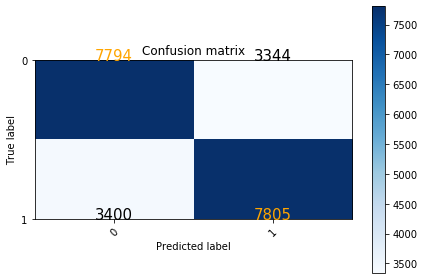

AUC: 0.6981652994131712


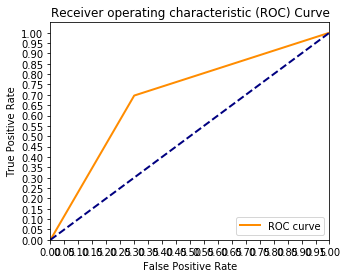

In [68]:
import stats_for_classification as stats

baseline_preds = pipe_baseline.predict(X_test)

stats.model_stats(y_test,baseline_preds,'Baseline Random Forest', False)


The baseline model successfully classified 69% of our testing data
Training accuracy was 77%, which suggests this model is overfitted.

In [ ]:
#let's try this model with gridsearch
pipe_baseline_grid = Pipeline([('scl', MinMaxScaler()),
                  ('pca', PCA(n_components=120)),
                  ('clf', RandomForestClassifier(random_state = 123))])

# Set grid search params
param_baseline_grid = [ 
  {'clf__n_estimators': [30,50,80],
   'clf__criterion': ['gini','entropy'], 
   'clf__max_depth': [20,40],  
   'clf__min_samples_leaf':[0.02,0.002],  
  }]

# Construct grid search
gs_rf = GridSearchCV(estimator=pipe_baseline_grid,
            param_grid=param_baseline_grid,
            scoring='accuracy',
            cv=3, verbose=2, return_train_score = True)

# Fit using grid search
gs_rf.fit(X_train, y_train)

# Best accuracy
print('Best accuracy: %.3f' % gs_rf.best_score_)

# Best params
print('\nBest params:\n', gs_rf.best_params_)

# {'clf__criterion': 'gini', 'clf__max_depth': 20, 'clf__min_samples_leaf': 0.1, 'clf__n_estimators': 100}
# {'clf__criterion': 'gini', 'clf__max_depth': 20, 'clf__min_samples_leaf': 0.02, 'clf__n_estimators': 100}
#  {'clf__criterion': 'gini', 'clf__max_depth': 20, 'clf__min_samples_leaf': 0.002, 'clf__n_estimators': 100}

In [ ]:
#Best accuracy: 0.677

#Best params:
# {'clf__criterion': 'entropy', 'clf__max_depth': 40, 'clf__min_samples_leaf': 0.002, 'clf__n_estimators': 30}

In [ ]:
gs_rf_preds = gs_rf.predict(X_test)

In [ ]:
print(classification_report(y_test, gs_rf_preds))

In [ ]:
confusion_matrix(y_test,gs_rf_preds)

In [ ]:
#roc curve
fpr, tpr, thresholds = roc_curve(y_test, gs_rf_preds)
print('AUC: {}'.format(auc(fpr, tpr)))

In [ ]:
print('AUC: {}'.format(auc(fpr, tpr)))
plt.figure(figsize=(10, 8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [70]:
#lets try a different model
from xgboost import XGBClassifier

In [71]:
# Instantiate XGBClassifier
clf = XGBClassifier(nthread=5)

# Fit XGBClassifier
clf.fit(X_train, y_train)

# Predict on training and test sets
training_preds = clf.predict(X_train)
test_preds = clf.predict(X_test)

# Accuracy of training and test sets
training_accuracy = accuracy_score(y_train, training_preds)
test_accuracy = accuracy_score(y_test, test_preds)

print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
print('Validation accuracy: {:.4}%'.format(test_accuracy * 100))

Training Accuracy: 68.68%
Validation accuracy: 68.29%


In [72]:
param_grid = {
    'learning_rate': [0.7,1],
    'max_depth': [20,30,40],
    'min_child_weight': [1, 2],
    'subsample': [0.5, 0.7],
    'n_estimators': [30,40,50],
}



grid_clf = GridSearchCV(clf, param_grid, scoring='accuracy', cv=None, n_jobs=1)
grid_clf.fit(X_train, y_train)

best_parameters = grid_clf.best_params_

print('Grid Search found the following optimal parameters: ')
for param_name in sorted(best_parameters.keys()):
    print('%s: %r' % (param_name, best_parameters[param_name]))

training_preds = grid_clf.predict(X_train)
test_preds = grid_clf.predict(X_test)
training_accuracy = accuracy_score(y_train, training_preds)
test_accuracy = accuracy_score(y_test, test_preds)

print('')
print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
print('Validation accuracy: {:.4}%'.format(test_accuracy * 100))

C:\Users\Nikol\AppData\Local\conda\conda\envs\learn-env\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Grid Search found the following optimal parameters: 
learning_rate: 0.7
max_depth: 40
min_child_weight: 1
n_estimators: 40
subsample: 0.7

Training Accuracy: 77.27%
Validation accuracy: 70.33%


In [ ]:
#Result
#Grid Search found the following optimal parameters: 
#learning_rate: 0.7
#max_depth: 40
#min_child_weight: 1
#n_estimators: 40
#subsample: 0.7

#Training Accuracy: 77.27%
#Validation accuracy: 70.33%

In [ ]:
#trying an improved version

In [83]:
param_grid = {
    'learning_rate': [0.5,0.7],
    'max_depth': [30,40],
    'min_child_weight': [0.5,1,2],
    'subsample': [0.5],
    'n_estimators': [60],
}



grid_clf = GridSearchCV(clf, param_grid, scoring='accuracy', cv=None, n_jobs=1)
grid_clf.fit(X_train, y_train)

best_parameters = grid_clf.best_params_

print('Grid Search found the following optimal parameters: ')
for param_name in sorted(best_parameters.keys()):
    print('%s: %r' % (param_name, best_parameters[param_name]))

training_preds = grid_clf.predict(X_train)
test_preds = grid_clf.predict(X_test)
training_accuracy = accuracy_score(y_train, training_preds)
test_accuracy = accuracy_score(y_test, test_preds)

print('')
print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
print('Validation accuracy: {:.4}%'.format(test_accuracy * 100))

C:\Users\Nikol\AppData\Local\conda\conda\envs\learn-env\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Grid Search found the following optimal parameters: 
learning_rate: 0.5
max_depth: 40
min_child_weight: 0.5
n_estimators: 60
subsample: 0.5

Training Accuracy: 77.2%
Validation accuracy: 70.08%


In [ ]:
#result
#Grid Search found the following optimal parameters: 
#learning_rate: 0.5
#max_depth: 40
#min_child_weight: 0.5
#n_estimators: 60
#subsample: 0.5

#Training Accuracy: 77.2%
#Validation accuracy: 70.08%

In [ ]:
#let's try the same with a pipeline

In [78]:
#Instantiate XGBClassifier
xgb_cl_pipeline = XGBClassifier(nthread=6)


xgb_pipe_baseline_grid = Pipeline([('scl', MinMaxScaler()),
                 ('pca', PCA(n_components=120)),
                 ('clf', xgb_cl_pipeline)])

# Set grid search params
param_grid = {
    'learning_rate': [0.1,0.2,0.4],
    'max_depth': [30,40,50],
    'min_child_weight': [0.5,1],
   'subsample': [0.5],
    'n_estimators': [60,80],
}


grid_xgb = GridSearchCV(xgb_cl_pipeline, param_grid, scoring='accuracy', cv=None, n_jobs=1)
grid_xgb.fit(X_train, y_train)

best_parameters = grid_xgb.best_params_

print('Grid Search found the following optimal parameters: ')
for param_name in sorted(best_parameters.keys()):
    print('%s: %r' % (param_name, best_parameters[param_name]))

training_preds = grid_xgb.predict(X_train)
test_preds = grid_xgb.predict(X_test)
training_accuracy = accuracy_score(y_train, training_preds)
test_accuracy = accuracy_score(y_test, test_preds)

print('')
print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
print('Validation accuracy: {:.4}%'.format(test_accuracy * 100))

C:\Users\Nikol\AppData\Local\conda\conda\envs\learn-env\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Grid Search found the following optimal parameters: 
learning_rate: 0.1
max_depth: 30
min_child_weight: 0.5
n_estimators: 80
subsample: 0.5

Training Accuracy: 76.81%
Validation accuracy: 70.08%


Classification Report for: XGB Pipeline Random Forest
              precision    recall  f1-score   support

           0       0.70      0.70      0.70     11138
           1       0.70      0.70      0.70     11205

    accuracy                           0.70     22343
   macro avg       0.70      0.70      0.70     22343
weighted avg       0.70      0.70      0.70     22343

Confusion matrix, without normalization
[[7822 3316]
 [3382 7823]]


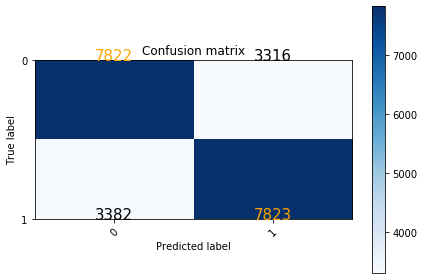

AUC: 0.7002254704258265


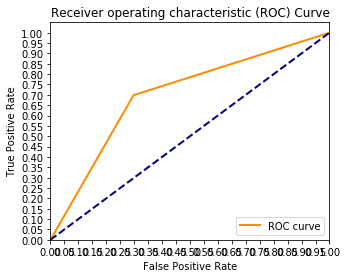

In [77]:
#Grid Search found the following optimal parameters: 
#learning_rate: 0.1
#max_depth: 30
#min_child_weight: 0.5
#n_estimators: 80
#subsample: 0.5

#Training Accuracy: 76.81%
#Validation accuracy: 70.08%






stats.model_stats(y_test,test_preds,'XGB Pipeline', False)

In [ ]:
xboost_preds = grid_clf.predict(X_test)

In [ ]:
import stats_for_classification as stats

In [ ]:
stats.model_stats(y_test,xboost_preds,'XBOOST',False)